## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 - Les LLMs et la génération augmentée de récupération (RAG) pour les questions-réponses<br> Automne 2024 </center>


## Identification de l'équipe:

### Groupe de laboratoire:

### Equipe numéro :

### Membres:

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. Soyez précis ! N'indiquez pas seulement : travail réparti équitablement

## 1. Introduction

### 1.1. Description du TP4

Dans ce TP, vous allez travailler sur un système de **génération augmentée de récupération**, ou **RAG** (pour Retrieval Augmented Generation en anglais) qui combine des modèles de langue génératifs et de recherche d'information.

Étant donnée une question, il faudra retrouver les passages les plus pertinents  avec un modèle de recherche. Ensuite, il faudra générer une réponse à la question en utilisant ces passages de texte. Vous aurez finalement à trouver des manières d'améliorer les performances de votre modèle RAG.

L'ensemble est noté sur 100 points.

### Description des données

Les passages donnés sont des textes en anglais de quelques phrases sur divers sujets. Par exemple, les mathématiques, la physique, la chimie, la biologie l'informatique, la musique et la psychologie. En général, les textes abordent des sujets très spécifiques reliés à un domaine. Par exemple, il pourrait y avoir 1000 textes parlant d'informatique et 100 qui abordent, à leur manière, la notion de mémoire. Parmi ces 100 passages, 5 pourraient aborder la mémoire dans un processeur spécifique.

En ce qui concerne les questions, elles sont basées sur les sujets de certains textes précis et on peut y répondre à l'aide d'au moins un des textes. Dans certains cas, plusieurs textes sont nécessaires pour répondre à la question. Par exemple, plusieurs textes pourraient aborder le processeur Intel i7-13700k, mais la question pourrait nécessiter l'information de tous ces textes pour trouver la réponse. 
Les questions ont été créées pour faire en sorte que les réponses soient assez courtes. Il peut s'agir d'un simple nombre ou de quelques mots (< 30 mots).


Vous trouverez ~ 13 000 passages dans le corpus pour ~ 1 700 paires de questions / réponses dans le jeu d'entraînement et ~ 500 dans le jeu de validation. Vous devez prédire 500 réponses aux questions du jeu de test.

### Exemple

Par exemple, pour la question

> What type of bonds are used to form branches in glycogen?

Avec l'approche RAG, plutôt que de générer la réponse directement, on va d'abord chercher dans un corpus de passages. Dans cet exemple, un des passages pertinents est :

> **Glycogen Structure and Function** : Glycogen is a molecular polymer of glucose used for energy storage. It is composed of linear chains of glucose molecules linked by α-1,4-glycosidic bonds, with branches formed off the chain via α-1,6-glycosidic bonds. The branches provide additional ""free ends"" for linear chains, allowing for faster glucose release.

Puis on génère une réponse conditionnée par les passages pertinents :

> α-1,6-glycosidic bonds

### Motivation

Le RAG est une approche très populaire en ce moment. Elle permet notamment d'avoir des sources qui supportent les réponses générées, ce qui peut être utile pour la vérification de faits ou pour contrôler les hallucinations. De plus, elle permet d'intégrer des connaissances externes et récentes dans les modèles de génération sans avoir à les ré-entraîner.

### Objectif du TP

Dans ce TP, vous implémenterez plusieurs systèmes de question-réponse. D'abord, vous testerez une approche de prompting qui n'utilise aucun passage pour aider le modèle de génération. Puis vous implémenterez un système figé qui utilise un modèle de plongements figé pour retrouver les $k$ passages les plus pertinents. Ces passages seront ensuite donnés à un modèle de génération figé aussi.

Enfin, vous implémenterez votre propre méthode dans l'objectif d'atteindre les meilleures performances dans la compétition Kaggle.

### Jeux de données

Vous avez 4 fichiers à votre disposition :
- 'rag_texts.csv' : le corpus de passages extraits de Wikipédia.
  - **id** : l'identifiant unique du passage.
  - **text** : le texte du passage.
- 'rag_questions_train.csv', 'rag_questions_val.csv' et 'rag_questions_test.csv' : les questions d'entraînement, de validation et de test.
  - **id** : l'identifiant unique de la question.
  - **question** : La question.
  - **text_id** (sauf pour le fichier de test) : la liste des identifiants des passages pertinents du corpus 'rag_texts.csv' pour la question.
  - **answer** (sauf pour le fichier de test) : la réponse à la question.

### Contraintes

- **Modèle génératif** : pour des raisons d'équité, le seul modèle de génération que vous pouvez utiliser est [microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct), disponible sur Hugging Face. Cette contrainte permet de mieux comparer les différentes approches et d'éviter que la performance soit uniquement due à un modèle de génération plus performant.
- Données externes : vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies.
- Modèles de plongements à utiliser: [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)

### 1.2. Librairies permises

Vous pouvez utiliser les librairies suivantes
- Numpy
- Pandas
- HuggingFace
- nltk
- SpaCy
- PyTorch
- faiss
- Langchain
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

### 1.3. Infrastructure

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

### 1.4. Remise

### Échéance

Fin de la session. La date précise sera indiquée dans les boites de remise sur Moodle.


### Livrables

Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les numéros de questions avec vos réponses dans le pdf grâce à l'outil que fournit Gradescope.


### Critères
1. Implantation correcte et efficace
2. Richesse de la solution proposée
3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
4. Commentaires clairs et informatifs
5. Aspect novateur
6. État de l'art synthétisé
7. Performance attendue des modèles
8. Réponses correctes/sensées aux questions de réflexion ou d'analyse

### CODE D’HONNEUR
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.


### 1.5. Kaggle

La compétion Kaggle sera accessible ici: https://www.kaggle.com/t/c970abbf273b4e13a642fce3bfe219be.

Vous devez recréer des équipes de 3 personnes sur Kaggle avec le même nom d'équipe que sur Moodle ainsi que les mêmes membres.

Le TP4 se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos meilleurs modèles.  
Pour tester votre modèle au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Il y aura deux types de résultats : votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants.
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle).


### 1.6. Description des données et métriques d’évaluation

Dans votre fichier de soumission, il doit y avoir une colonne _id_ et une colonne _answer_. La colonne _id_ doit correspondre à l'identifiant unique de la question et la colonne _answer_ doit correspondre à la réponse générée par votre modèle.

Nous utiliserons la métrique **BLEU**, vue en cours, pour évaluer les réponses générées par rapport au jeu de référence (gold standard).

In [80]:
# Import des librairies

import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from typing import Optional
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline, BitsAndBytesConfig
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
from nltk.translate.bleu_score import sentence_bleu
import nltk
import faiss

In [2]:
# Si vous stockez vos données sur Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [81]:
root_path = './'
data_path = root_path + 'data/'

## 2. Analyse exploratoire et modèle de génération simple (15 points)

Pour commencer ce TP, et pour fixer des modèles de base (baselines), vous allez utiliser un modèle de génération simple pour répondre aux questions. Vous utiliserez le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'** disponible sur Hugging Face. Dans cette partie, vous devez simplement générer des réponses aux questions de l'ensemble de validation (_questions_val.csv_) sans utiliser de passages pour aider le modèle.

### 2.1. Chargement des données (5 points)

#### 2.1.1 Taille des données (1 point)

Affichez la taille de tous les jeux de données et quelques questions de l'ensemble d'entraînement

In [82]:
# TODO

questions_test = pd.read_csv(data_path + 'questions_test.csv')
questions_train = pd.read_csv(data_path + 'questions_train.csv')
questions_val = pd.read_csv(data_path + 'questions_val.csv')
texts = pd.read_csv(data_path + 'texts.csv')

print(f"Taille du jeu d'entrainement : {len(questions_train)} \nTaille du jeu de validation : {len(questions_val)} \nTaille du jeu de test  :{len(questions_test)}\n")

print("Quelques questions de l'ensemble d'entrainement :")
questions_train['question'].head()

# END TODO

Taille du jeu d'entrainement : 1747 
Taille du jeu de validation : 500 
Taille du jeu de test  :500

Quelques questions de l'ensemble d'entrainement :


0    What type of insects are vectors for the Haemo...
1    What is the basis of the security of the BBS a...
2    What is the purpose of the catalase test in ba...
3    What type of cells clear small particles in ve...
4    What information is needed to decrypt a messag...
Name: question, dtype: object

#### 2.1.2 Analyse exploratoire (4 points)

a) Sur l'ensemble d'entraînement, affichez :
- Le nombre moyen de mots dans une question
- Le nombre moyen de mots dans une réponse
- Le nombre moyen de passages nécessaires pour répondre à une question
- Le nombre minimal de passages nécessaires pour répondre à une question
- Le nombre maximal de passages nécessaires pour répondre à une question


In [5]:
# TODO

data_question_word_count = questions_train['question'].apply(lambda x: len(x.split()))
mean_words_q = round(np.mean(data_question_word_count), 2)


data_answer_word_count = questions_train['answer'].apply(lambda x: len(x.split()))
mean_words_r = round(np.mean(data_answer_word_count), 2)

mean_passages = round(np.mean(questions_train['text_ids'].apply(lambda x: len(x.split()))),2)
min_passages = np.min(questions_train['text_ids'].apply(lambda x: len(x.split())))
max_passages = np.max(questions_train['text_ids'].apply(lambda x: len(x.split())))

print(f"Le nombre moyen de mots dans une question : {mean_words_q}\n"
      f"Le nombre moyen de mots dans une réponse : {mean_words_r}\n"
      f"Le nombre moyen de passages nécessaires pour répondre à une question : {mean_passages}\n"
      f"Le nombre minimal de passages nécessaires pour répondre à une question : {min_passages}\n"
      f"Le nombre maximal de passages nécessaires pour répondre à une question : {max_passages}\n")

# END TODO

Le nombre moyen de mots dans une question : 10.37
Le nombre moyen de mots dans une réponse : 6.08
Le nombre moyen de passages nécessaires pour répondre à une question : 2.84
Le nombre minimal de passages nécessaires pour répondre à une question : 2
Le nombre maximal de passages nécessaires pour répondre à une question : 4



b) De plus, affichez des histogrammes décrivant la distribution du nombre de mots des questions, des réponses et des textes. Utilisez des bacs (bins) de 50. Commentez vos résultats.

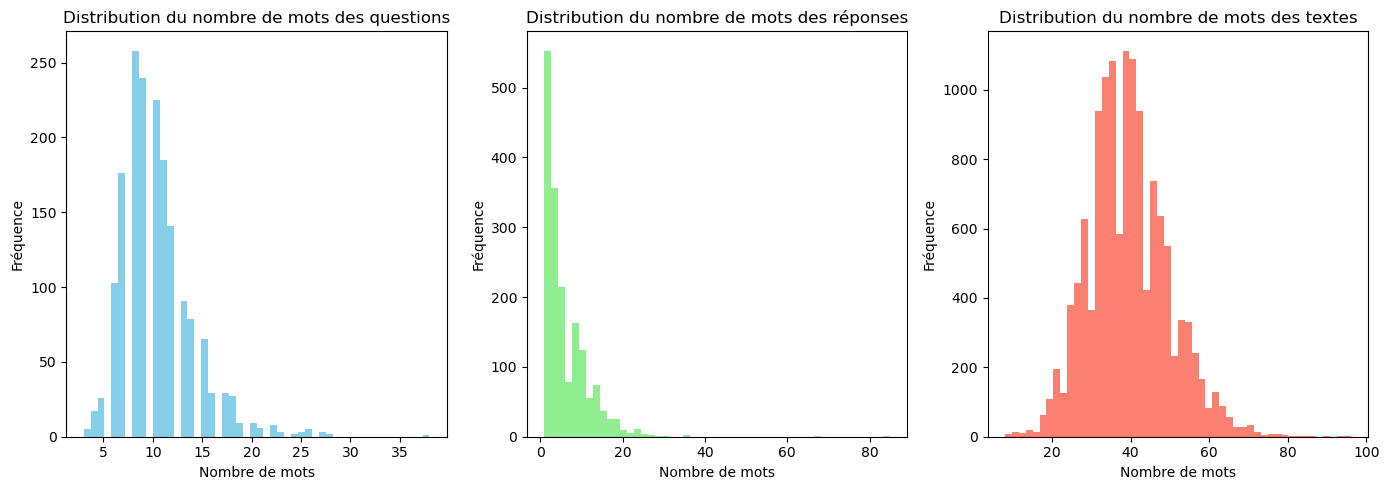

In [6]:
# TODO

texts_world_count = texts['text'].apply(lambda x: len(x.split()))
bins = 50

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.hist(data_question_word_count, bins=bins, color='skyblue')
plt.title('Distribution du nombre de mots des questions')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

plt.subplot(1, 3, 2)
plt.hist(data_answer_word_count, bins=bins, color='lightgreen')
plt.title('Distribution du nombre de mots des réponses')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

plt.subplot(1, 3, 3)
plt.hist(texts_world_count, bins=bins, color='salmon')
plt.title('Distribution du nombre de mots des textes')
plt.xlabel('Nombre de mots')
plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

# TODO

COMMENTAIRE: 

### 2.2. Chargement du modèle et génération des réponses (5 points)

Nous allons maintenant évaluer la performance d'un modèle de langue à répondre aux questions de l'ensemble de validation. Chargez d'abord le modèle **'microsoft/Phi-3-mini-128k-instruct'** avec la librairie `transformers` de huggingface et générez les réponses du modèle à partir de la question. Générez au maximum 32 nouveaux jetons.

In [83]:
import torch

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [84]:
from transformers import AutoTokenizer, AutoModelForCausalLM

model_name = 'microsoft/Phi-3-mini-128k-instruct'
gen_tokenizer = AutoTokenizer.from_pretrained(model_name)
gen_model = AutoModelForCausalLM.from_pretrained( 
    "microsoft/Phi-3-mini-128k-instruct",  
    device_map=DEVICE,  
    torch_dtype=torch.float16,  
    trust_remote_code=True,  
)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [21]:
# # Question de l'utilisateur
# input_question = 'What is the capital of Vietnam ?'

# # Préparer les entrées pour le modèle
# input_template = tokenizer.apply_chat_template([
#     {'role': 'system', 'content': 'You are a helpful assistant.'},
#     {'role': 'user', 'content': input_question}
# ], tokenize=False, add_generation_prompt=True)
# print(input_template)

# inputs = tokenizer(input_template, return_tensors="pt")
# max_length = tokenizer(input_template, return_tensors="pt")["input_ids"].shape[1] + 32

# inputs = {key: value.to(DEVICE) for key, value in inputs.items()}

# # Générer la réponse
# # outputs = model.generate(**inputs, max_length=max_length)
# # outputs = model.generate(**inputs, max_length=max_length, num_beams=5, no_repeat_ngram_size=2)
# # outputs = model.generate(**inputs, max_length=max_length, do_sample=True, top_p=0.95, temperature=0.7)
# outputs = model.generate(**inputs, max_length=max_length, do_sample=True, top_k=50)

# # Décoder et afficher la réponse
# response = tokenizer.decode(outputs[0], skip_special_tokens=True)
# print(response.split(input_question)[-1].strip())

In [ ]:
# questions_val_test = pd.read_csv(data_path + 'questions_val_test.csv')

# # Faire une approche par batch
# context = "Answer using as few words as possible : "

# generated_responses = []
# for index, row in questions_val_test.iterrows():
#     input_question = row['question']

#     input = gen_tokenizer.apply_chat_template([
#         {'role': 'system', 'content': 'You are a helpful assistant.'},
#         {'role': 'user', 'content': context + input_question}
#     ], add_generation_prompt=True, return_tensors="pt").to(DEVICE)

#     print(input)

#     output = gen_model.generate(input, max_new_tokens=32)

#     generated_response = gen_tokenizer.decode(output[0][input.numel():], skip_special_tokens=True)
#     generated_responses.append(generated_response)

# # print(generated_responses)

tensor([[32006,   887,   526,   263,  8444, 20255, 29889, 32007, 32010,   673,
           773,   408,  2846,  3838,   408,  1950,   584,  1724,   338,   278,
          2779,   310,   278,   341, 29906, 29900, 29896, 29963, 17305,   310,
           315, 29979, 12750,  5659, 29906,   373,  5544, 20193,   304,   365,
         24495, 29946, 29973, 32007, 32001]], device='cuda:0')
tensor([[32006,   887,   526,   263,  8444, 20255, 29889, 32007, 32010,   673,
           773,   408,  2846,  3838,   408,  1950,   584,  1724,   338,   278,
          1820,  4328,   297,   278,  3829,   310,  1559, 29890,   481,   264,
          1567,  9401,   304,  6584,   293,   453,  1144, 29973, 32007, 32001]],
       device='cuda:0')


In [41]:
def process_batch(batch_questions, tokenizer, model, context, device):
    inputs = [
        tokenizer.apply_chat_template(
            [{'role': 'system', 'content': 'You are a helpful assistant.'},
             {'role': 'user', 'content': context + question}],
            tokenize=False,
            add_generation_prompt=True
        )
        for question in batch_questions
    ]
    inputs = tokenizer(inputs, return_tensors="pt", padding=True).to(device)

    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=32
    )
    responses = [
        tokenizer.decode(output[inputs.input_ids.size(1):], skip_special_tokens=True)
        for output in outputs
    ]
    return responses

In [ ]:
batch_size = 8
questions_val = pd.read_csv(data_path + 'questions_val.csv')
questions = questions_val['question'].tolist()
context = "Answer using as few words as possible : "

generated_responses = []
for i in range(0, len(questions), batch_size):
    batch_questions = questions[i:i + batch_size]
    batch_responses = process_batch(batch_questions, gen_tokenizer, gen_model, context, DEVICE)
    generated_responses.extend(batch_responses)

print(generated_responses)

['M201V variant of CYSLTR2 reduces responsiveness to LTD4.', 'Carbapenems have a different beta-lactam ring fused to a five-membered thiazole ring.', '8 facets: 8-demicubes and 8-8-demicubes.', 'Scheduled substance.', 'Estrone', 'Serotonin receptors', 'On chromosome 9', 'AMB (5-Amino-10-bromo-phenothiazine) is a chemical compound.', 'Glutamate', "BARF is not an anion; it's a colloquial term for raw meat.", "At low temperatures, it's proportional to T^2.", 'Present antigen to CD4+ T cells', 'Stibine, or antimony hydride, is used as a dopant in semiconductor manufacturing to modify electrical properties.', 'To facilitate the substitution reaction.', 'Chemical vapor deposition (CVD)', 'Molecular weight, chain length, and crosslinking density.', 'DMTMM is used as a chiral auxiliary in asymmetric amide synthesis.', "It must satisfy the Baxter's criterion.", 'Approximately 4 million light-years from Earth.', 'To nourish and innervate the tooth', 'Approximately 25.3 kDa', 'Origin of developme

In [43]:
df_true = questions_val[['id', 'answer']].copy()
df_pred = questions_val[['id']].copy()
df_pred['answer'] = generated_responses

### 2.3. Évaluation des réponses (3 points)

Complétez la fonction `evaluate_bleu` et utilisez la métrique BLEU pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. Évaluez votre modèle avec les métriques BLEU-1 et BLEU-2. BLEU-1 ne considère que les unigrammes pour évaluer la réponse et BLEU-2 considère les bigrammes aussi. Pour séparer une séquence en mots, vous pouvez simplement utiliser la fonction `split()`.

In [44]:
import warnings
from nltk.translate.bleu_score import sentence_bleu

def evaluate_bleu(df_true: pd.DataFrame, df_pred: pd.DataFrame, bleu_type: int):
    """
    Évalue les réponses générées en utilisant la métrique BLEU.

    Paramètres:
    df_true (pd.DataFrame): DataFrame contenant les vraies réponses avec des colonnes 'id' et 'answer'.
    df_pred (pd.DataFrame): DataFrame contenant les réponses prédites avec des colonnes 'id' et 'answer'.
    bleu_type (int): Nombre (soit 1 ou 2) correspondant aux n-grammes considérés pour la métrique (bleu_type = 1 : BLEU-1, bleu_type = 2 : BLEU-2)

    Retourne:
    float: Score BLEU moyen sur toutes les entrées.
    """
    # TODO

    df_merged = pd.merge(df_true[['id', 'answer']], df_pred[['id', 'answer']], on='id', suffixes=('_true', '_pred'))

    weights = (1.0, 0.0, 0.0, 0.0) if bleu_type == 1 else (0.5, 0.5, 0.0, 0.0)
    
    bleu_scores = []

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for _, row in df_merged.iterrows():
            reference = row['answer_true'].split()
            candidate = row['answer_pred'].split() 

            bleu_score = sentence_bleu([reference], candidate, weights=weights)
            bleu_scores.append(bleu_score)
        
    mean_bleu = sum(bleu_scores) / len(bleu_scores)
    return mean_bleu

    # END TODO

In [45]:
# TODO
print(f"Le score BLEU-1 est {evaluate_bleu(df_true, df_pred, 1):.3f}.")
print(f"Le score BLEU-2 est {evaluate_bleu(df_true, df_pred, 2):.3f}.")
# TODO

Le score BLEU-1 est 0.161.
Le score BLEU-2 est 0.067.


### 2.4. Commentaire (2 points)

Reportez, puis commentez la performance obtenue ici.

Performance obtenue:

## 3. Approche RAG figé (45 points)

Dans cette partie, vous allez implémenter une approche simple de RAG figé. On dit ici que le modèle est figé car on ne ré-entraîne aucun modèle. Vous implémenterez deux variantes : avec ou sans l'utilisation d'un algorithme d'indexation.

Dans la méthode d'implémentation du RAG figé, vous allez d'abord retrouver les passages pertinents pour chaque question avec un modèle de plongements de type Transformers, puis générer une réponse conditionnée par ces passages.

Dans cette partie, on utilisera
- le modèle de plongements (embedding-model) **[BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)** pour obtenir les vecteur de plongements des questions et des passages
- le modèle de génération (generative-model) **[microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)** pour générer les réponses

### 3.1 RAG figé sans indexation (23 points)

#### 3.1.1 Passages pertinents (8 points)

Pour retrouver les passages pertinents, vous devez d'abord encoder les questions et les passages avec le modèle de plongements. Puis, vous devez calculer la similarité cosinus entre les questions et les passages pour retrouver les $k$ passages les plus pertinents pour chaque question.

In [85]:
import torch
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
BATCH_SIZE = 32

In [86]:
# TODO
from transformers import AutoTokenizer, AutoModel
model_name = 'BAAI/bge-small-en-v1.5'
emb_tokenizer = AutoTokenizer.from_pretrained(model_name)
emb_model = AutoModel.from_pretrained(model_name)
emb_model.to(DEVICE)
# END TODO

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 384, padding_idx=0)
    (position_embeddings): Embedding(512, 384)
    (token_type_embeddings): Embedding(2, 384)
    (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=384, out_features=384, bias=True)
            (key): Linear(in_features=384, out_features=384, bias=True)
            (value): Linear(in_features=384, out_features=384, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=384, out_features=384, bias=True)
            (LayerNorm): LayerNorm((384,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [48]:
def encode_sequences(sequences: list, tokenizer, model, device = DEVICE, batch_size = BATCH_SIZE):
    """
    Encode les textes en utilisant le modèle passé en paramètre pour générer les plongements des textes

    Paramètres:
    sequences    : Liste de séquence à transformer en plongements
    tokenizer   : Segmenteur du modèle de plongements
    model       : Modèle de plongements
    device      : Machine sur laquelle les opérations doivent être effectuées
    batch_size  : Taille des lots lors de la génération des traitements
    """
    # TODO

    model.eval()

    embeddings = []
    
    for i in range(0, len(sequences), batch_size):
        batch = sequences[i:i + batch_size]
    
        inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt").to(device)
        
        with torch.no_grad():
            output = model(**inputs).last_hidden_state # .last_hidden_state : Dimension (torch.Size([batch_size, sequence_length, hidden_size])) -> chaque token de la séquence à un plongement de taille 384 !
            embedding = output.mean(dim=1)  # Moyenne sur la dimension des tokens (dimension sequence_length) pour avoir la représentation de la séquence
            embeddings.append(embedding)
    
    return torch.cat(embeddings, dim=0)

    # END TODO

In [ ]:
# TODO
sequences = ["What is the capital of France?", "What is the capital of Vietnam?"]
embeddings = encode_sequences(sequences, emb_tokenizer, emb_model, device='cuda', batch_size=1)
print(embeddings.shape) # Dim (Batch_size,384)
# END TODO

torch.Size([2, 384])


#### 3.1.2 Évaluation des passages retrouvés avec Recall@k et precision@k (7 points)

Maintenant que les passages ont tous été encodés, on peut évaluer si les passages retrouvés sont pertinents. En prenant les $k$ premiers passages, on peut évaluer si on retrouve les bons passages associés aux questions. C'est un des avantages du système RAG : on peut évaluer de façon indépendante la qualité du système qui retrouve les passages pertinents et de celui qui génère les réponses. Cela permet notamment d'évaluer quels sont les points forts et points faibles du système.

Pour cela, vous allez utiliser les métriques **Precision@k** et **Recall@k** définies dans les équations suivantes. Implémentez ces métriques.

$$\text{Precision@k} = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{k}$$

$$\text{Recall@k} (Rappel@k) = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{\text{Nombre total d'éléments pertinents}}$$


In [49]:
def compute_recall_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Recall@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne:
    Recall moyen
    """
    # TODO
    total_recall = 0
    for true_texts, predicted_texts in zip(ground_truth, predictions):

        true_set = set(true_texts)  
        predicted_set = set(predicted_texts)

        relevant_and_retrieved = true_set.intersection(predicted_set)
        
        recall = len(relevant_and_retrieved) / len(true_set)
        total_recall += recall
   
    average_recall = total_recall / len(ground_truth) 
    return average_recall

    # END TODO

In [50]:
def compute_precision_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Precision@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et 
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne: 
    Précision moyenne
    """

    # TODO

    total_precision = 0
    for true_texts, predicted_texts in zip(ground_truth, predictions):
        true_set = set(true_texts)
        predicted_set = set(predicted_texts)
        relevant_and_retrieved = true_set.intersection(predicted_set)
        
        precision = len(relevant_and_retrieved) / len(predicted_set) 
        total_precision += precision
    
    average_precision = total_precision / len(ground_truth) 
    return average_precision

    # END TODO


#### 3.1.3 Résultat d'évaluation (5 points)
Implémentez la fonction _'retrieve_passages'_ qui retourne les indices des $k$ passages les plus similaires pour une question. Utilisez la similarité cosinus pour comparer les passages et les questions. Évaluez ensuite votre modèle récupérant les passages avec les métriques Precision@k et Recall@k sur le jeu de validation. Calculez avec $k={1, 2, 3, 4, 5}$.

In [51]:
def cosine_similarity(questions_encoded, text_embeddings):
    # Normalisation des embeddings
    questions_normed = questions_encoded / torch.norm(questions_encoded, p=2, dim=1, keepdim=True)
    texts_normed = text_embeddings / torch.norm(text_embeddings, p=2, dim=1, keepdim=True)
    
    # Calcul de la similarité cosinus
    cosine_distance = torch.mm(questions_normed, texts_normed.t())
    return cosine_distance

In [52]:
import torch
import torch.nn.functional as F

def retrieve_passages(questions: list, passage_embed: torch.Tensor, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    passage_embed   : Tenseur contenant les plongements de chaque passage (n, dim)
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO

    question_embeddings = encode_sequences(questions, embedding_model_tokenizer, embedding_model)
    # print(question_embeddings.unsqueeze(1)) # Dimension (nb_questions, 1, 384)
    # print(passage_embed.unsqueeze(0)) # Dimension (1, nb_passages, 384)
    # similarities = F.cosine_similarity(question_embeddings.unsqueeze(1), passage_embed.unsqueeze(0), dim=-1) # Dimension  (nb_questions, nb_passages)
    similarities = cosine_similarity(question_embeddings, passage_embed)
    top_k_indices = torch.topk(similarities, k=k, dim=-1).indices.tolist() # Indices du topk des passages (dim=-1) pour une question donnée

    return top_k_indices

    # END TODO


In [87]:
# TODO
passages = texts['text'].tolist()
questions = questions_val['question'].tolist()

passage_embed = encode_sequences(passages, emb_tokenizer, emb_model)
# END TODO

In [45]:
print(passage_embed.shape)

torch.Size([13314, 384])


In [88]:
k = 3
top_k_indices = retrieve_passages(questions, passage_embed, k, emb_tokenizer, emb_model)
print(top_k_indices)

[[10039, 1885, 4270], [8865, 5333, 2651], [11620, 4618, 10382], [9353, 13153, 10830], [11053, 222, 7992], [5883, 2327, 7771], [12254, 8676, 10546], [13153, 9353, 2057], [7771, 5883, 2327], [2787, 10699, 8395], [3634, 8959, 9875], [3806, 3320, 10028], [4117, 10619, 9690], [10602, 4420, 509], [8928, 7002, 1351], [2764, 108, 3014], [359, 7309, 13017], [5152, 2617, 10799], [10111, 11346, 5227], [9316, 4898, 12344], [13285, 6075, 10817], [4108, 6840, 9292], [8248, 10524, 5330], [10094, 5730, 8352], [6262, 2648, 6840], [10650, 11373, 11941], [6170, 391, 10517], [9652, 1705, 8340], [13100, 9299, 4780], [11345, 6610, 7292], [7220, 2091, 5257], [9856, 4817, 3235], [11733, 406, 4366], [6400, 1207, 1536], [13015, 11880, 4460], [5698, 6133, 8453], [4027, 7127, 8051], [9421, 5907, 7968], [6337, 745, 7447], [9622, 4233, 3467], [2316, 5837, 8599], [9831, 3040, 2174], [10298, 6834, 12948], [8967, 2762, 4632], [9348, 7891, 12401], [7854, 7021, 10579], [4612, 13079, 1799], [7999, 2789, 2232], [12201, 91

#### 3.1.4 Graphique (3 points)
Affichez maintenant un graphique de vos résultats de la question précédente en mettant à l'axe des x la valeur de $k$ et à l'axe des y la valeur de la précision et du rappel. Quel est le nombre optimal de passages à passer au modèle en vous basant sur le recall@k et precision@k ? Pourquoi ?

<class 'int'>


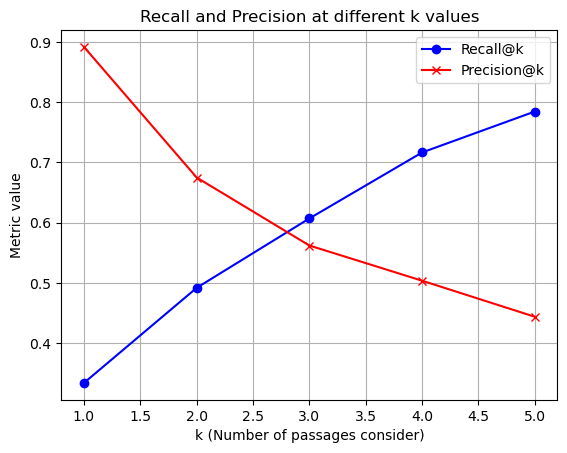

In [89]:
# TODO
top_ground_truth = questions_val['text_ids'].apply(lambda x: [int(num) for num in x.strip('[]').split()]).to_list()
print(type(top_ground_truth[0][0]))

recall  = []
precision = []
for k in range(1,6) : 
    top_passages = retrieve_passages(questions, passage_embed, k, emb_tokenizer, emb_model)
    recall.append(compute_recall_at_k(top_ground_truth, top_passages))
    precision.append(compute_precision_at_k(top_ground_truth, top_passages))


plt.plot(range(1,6), recall, marker='o', color='b', label='Recall@k')
plt.plot(range(1,6), precision, marker='x', color='r', label='Precision@k')
plt.xlabel('k (Number of passages consider)')
plt.ylabel('Metric value')
plt.title('Recall and Precision at different k values')
plt.legend()
plt.grid(True)
plt.show()

# END TODO

### 3.2 RAG figé avec FAISS (14 points)

Maintenant on vous demande d'utiliser FAISS pour l'indexation des plongements des passages.

[FAISS (Facebook AI Similarity Search)](https://ai.meta.com/tools/faiss/) est une bibliothèque open-source développée par Meta pour la recherche de similarité rapide sur des vecteurs denses, comme des embeddings de textes ou d'images. Elle est optimisée pour gérer de grands volumes de données en haute dimension et peut être accélérée avec des GPU. FAISS est largement utilisée pour des systèmes de recommandation ou la recherche d'information à grande échelle. Pour plus de détails, veuillez consulter  [le tutoriel sur Moodle](https://moodle.polymtl.ca/course/view.php?id=2813).


#### 3.2.1 Initialisez l'indexation FAISS avec les plongements des passages (2 points)

Utilisez les plongements des passages générés au niveau de la question 3.1.1 et indexez-les avec FAISS. Vérifiez que le nombre de plongements dans l'objet FAISS est bien le même que le nombre de passages. N'oubliez pas qu'on veut une indexation basée sur la similarité cosinus.

In [57]:
# TODO
passage_embeddings = passage_embed.cpu().numpy()

faiss.normalize_L2(passage_embeddings) #  normalisation des vecteurs pour l'approche similarité cosinus
d = passage_embeddings.shape[1]
index = faiss.IndexFlatIP(d)  # index Faiss basé sur le produit "scalaire" -> la recherche donnera les k documents les plus similaires basé sur le produit scalaire entre le vecteur d'entrée et les vecteurs de passage_embeddings
index.add(passage_embeddings)

assert index.ntotal == passage_embeddings.shape[0], "Le nombre de plongements dans l'objet FAISS n'est pas le même que le nombre de passages."
# END TODO

#### 3.2.2 Récupération des passages avec FAISS (4 points)

Implémentez la fonction _'retrieve_passages_faiss'_ qui retourne les indices des $k$ passages les plus similaires pour une question à l'aide d'un indexation FAISS


In [58]:
def retrieve_passages_faiss(questions: list, vector_index: faiss.IndexFlatL2, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    vector_index    : L'objet d'indexation FAISS
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # TODO
    question_embeddings = encode_sequences(questions, embedding_model_tokenizer, embedding_model)
    
    # Normalisation
    question_embeddings = question_embeddings.cpu().numpy()
    faiss.normalize_L2(question_embeddings)
    
    _, top_k_indices = vector_index.search(question_embeddings, k)  # indices de dimension (len(questions), k)
    
    return top_k_indices
    # END TODO

#### 3.2.3 Exécution de FAISS (4 points)

Exécutez maintenant la fonction _"retrieve_passages_faiss"_ pour récupérer les bons passages pour les questions du jeu de validation avec votre k optimal.

In [90]:
# TODO
print(retrieve_passages_faiss(questions, index, 3, emb_tokenizer, emb_model))
# END TODO


[[10039  1885  4270]
 [ 8865  5333  2651]
 [11620  4618 10382]
 ...
 [ 2838  1001  7523]
 [13016 10021 11171]
 [ 1728  5978  6130]]


#### 3.2.4 Calculez les métriques Precision@K et Rappel@K pour les passages retrouvés avec FAISS avec votre k optimal (2 points) 

In [91]:
# TODO
top_passages = retrieve_passages_faiss(questions, index, 3, emb_tokenizer, emb_model)
print(compute_recall_at_k(top_ground_truth, top_passages))
print(compute_precision_at_k(top_ground_truth, top_passages))
# END TODO

0.6069999999999997
0.5619999999999998


#### 3.2.5 Quelle remarque pouvez-vous faire sur l'utilisation de FAISS en termes de passages retrouvés, de temps d'exécution et de tout autre élément qui vous semble approprié ? (2 points)

> Réponse

### 3.3 Génération des réponses (5 points)

Générez maintenant les réponses des questions sur l'ensemble de validation avec les passages récupérés. Pour générer les réponses, vous devez concaténer les passages pertinents avec la question et donner le tout au modèle de génération. Faites-le sur l'ensemble du jeu de validation. Pour la méthode, vous avez le choix entre les passages retrouvés avec FAISS ou manuellement (avec votre propre implémentation). Faites cela pour toutes les valeurs de $k$: (1, 2, 3 et 4).

In [ ]:
# # TODO
# # Générez les prompts
# context = {k: [] for k in range(1, 5)}
# for k in range(1,5) : 
#     context[k] = []

#     faiss_passages = retrieve_passages_faiss(questions, index,  k, tokenizer, model) 
#     for i,passages_id in enumerate(faiss_passages) : 
#         passages = [texts[texts['id'] == i]['text'].iloc[0] for i in passages_id]
#         context[k].append("Answer using as few words as possible : " + " ".join(passages))

# print(len(context[1]))

500


In [ ]:
# k = 3
# prompts = []
# faiss_passages = retrieve_passages_faiss(questions, index, k, emb_tokenizer, emb_model)  # Array where each line corresponds to a list of k passage IDs for each question
# help_instruction = " Answer the question using as few words as possible : "

# # Loop over each question and its corresponding passage IDs
# for i, passages_id in enumerate(faiss_passages):
#     passages = []
    
#     # Loop over the passage IDs for the current question
#     for passage_id in passages_id:
#         # Fetch the text for each passage ID
#         passage_text = texts[texts['id'] == passage_id]['text'].iloc[0]
#         passages.append(passage_text)  # Add the passage text to the list of passages
    
#     # Now join the passages and concatenate with the question
#     context_string = " ".join(passages) + " " + help_instruction + questions[i]
    
#     # Append the final context string to the context list
#     prompts.append(context_string)


# print(prompts)


[' Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect.  Cysteinyl leukotriene receptor 2 (CYSLTR2) is a receptor that binds to cysteinyl leukotrienes (CysLTs) and contributes to mediating allergic and hypersensitivity reactions in humans. It is expressed in various cell types, including blood eosinophils, platelets, and tissue mast cells.  The human CYSLTR2 gene maps to chromosome 13 and consists of four exons. The protein encoded by CYSLTR2 is composed of 347 amino acids and shares only 31% amino acid identity with the CysLTR1 protein. CYSLTR2 is a G protein-coupled receptor that activates the Gq alpha subunit and/or Ga subunit of its coupled G protein when bound to its CysLT ligands.  Answer the question using as few words as possible : What is the effect of the M2

Affichez un exemple d'invite (prompt) qui sera envoyé au modèle de génération

In [ ]:
# # TODO
# # Affichez un exemple d'invite
# print(prompts[0])
# # END TODO

 Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect.  Cysteinyl leukotriene receptor 2 (CYSLTR2) is a receptor that binds to cysteinyl leukotrienes (CysLTs) and contributes to mediating allergic and hypersensitivity reactions in humans. It is expressed in various cell types, including blood eosinophils, platelets, and tissue mast cells.  The human CYSLTR2 gene maps to chromosome 13 and consists of four exons. The protein encoded by CYSLTR2 is composed of 347 amino acids and shares only 31% amino acid identity with the CysLTR1 protein. CYSLTR2 is a G protein-coupled receptor that activates the Gq alpha subunit and/or Ga subunit of its coupled G protein when bound to its CysLT ligands.  Answer the question using as few words as possible : What is the effect of the M201

In [102]:
def process_batch_prompts(batch_prompts, tokenizer, model, device):
    inputs = [
        tokenizer.apply_chat_template(
            [{'role': 'system', 'content': 'You are a helpful assistant.'},
             {'role': 'user', 'content': prompt}], 
            tokenize=False,
            add_generation_prompt=True
        )
        for prompt in batch_prompts
    ]
    
    # Convertir les entrées en tenseurs pour le modèle
    inputs = tokenizer(inputs, return_tensors="pt", padding=True).to(device)
    
    # Générer les réponses pour le batch
    outputs = model.generate(
        input_ids=inputs['input_ids'],
        attention_mask=inputs['attention_mask'],
        max_new_tokens=32
    )
    
    # Décoder les réponses
    responses = [
        tokenizer.decode(output[inputs.input_ids.size(1):], skip_special_tokens=True)
        for output in outputs
    ]

    print(responses)
    
    return responses

In [ ]:
# # TODO
# # Envoyez les prompts au modèle
# batch_size = 8

# generated_responses = []
# for i in range(0, len(prompts), batch_size):
#     batch_prompts = prompts[i:i + batch_size]
#     batch_responses = process_batch_prompts(batch_prompts, gen_tokenizer, gen_model, DEVICE)
#     generated_responses.extend(batch_responses) 
# # END TODO

['Decreased responsiveness to LTD4.', 'A carbon atom replaces the sulfur atom in position 1.', '8-demicubes and 8-orthoplex facets.', 'Controlled substance in several states, not federally scheduled but illegal in Florida.', 'Androstenedione', 'NMDA receptor, μ-opioid receptor, κ-opioid receptor, and sigma σ1 receptor', 'Chromosome 7', 'Synthetic cannabinoid']
['3-MeO-PCP', 'Non-coordinating anion', 'Proportional to temperature and density of states at the Fermi level.', 'To present antigens to T-cells for immune response activation.', 'Doping silicon with antimony.', 'To absorb hydrogen chloride and facilitate the reaction.', 'Dry chlorine treatment', 'Persistence length']
['Activation of carboxylic acids', 'Avoidance of certain vincular patterns.', '3.2 million light-years', 'To nourish and hydrate the tooth structure, and provide sensory function.', '24.2 kDa', '"On-" means "being" or "origin".', '324 amino acids long', 'The ratio of the speed of light in vacuum to the phase velocit

KeyboardInterrupt: 

In [ ]:
# df_true_faiss = questions_val[['id', 'answer']].copy()
# df_pred_faiss = questions_val[['id']].copy()
# df_pred_faiss['answer'] = generated_responses

In [107]:
k_values = [1, 2, 3, 4]
generated_responses = {}

# Loop over different values of k
for k in k_values:
    prompts = []  # Reset prompts for each value of k
    faiss_passages = retrieve_passages_faiss(questions, index, k, emb_tokenizer, emb_model)  # Array where each line corresponds to a list of k passage IDs for each question
    help_instruction = " Answer the question using as few words as possible : "

    # Loop over each question and its corresponding passage IDs
    for i, passages_id in enumerate(faiss_passages):
        passages = []

        # Loop over the passage IDs for the current question
        for passage_id in passages_id:
            # Fetch the text for each passage ID
            passage_text = texts[texts['id'] == passage_id]['text'].iloc[0]
            passages.append(passage_text)

        context_string = " ".join(passages) + " " + help_instruction + questions[i]
        prompts.append(context_string)

    # Process the prompts for the current value of k
    batch_size = 10
    batch_responses = []

    for i in range(0, len(prompts), batch_size):
        batch_prompts = prompts[i:i + batch_size]
        batch_responses.extend(process_batch_prompts(batch_prompts, gen_tokenizer, gen_model, DEVICE))

    # Store the generated responses for the current k value
    generated_responses[k] = batch_responses

    print(f"Done with k = {k} !")

print(generated_responses[1])
print(generated_responses[2])
print(generated_responses[3])
print(generated_responses[4])

OutOfMemoryError: CUDA out of memory. Tried to allocate 16.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 14.28 GiB is allocated by PyTorch, and 231.71 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
df_true_faiss = questions_val[['id', 'answer']].copy()
df_pred_faiss = questions_val[['id']].copy()
df_pred_faiss['answer'] = generated_responses

### 3.4 Évaluation des réponses (3 points)

Utilisez la métrique BLEU (BLEU-1 et BLEU-2) pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. 

In [ ]:
# TODO
print(f"Le score BLEU-1 est {evaluate_bleu(df_true_faiss, df_pred_faiss, 1):.3f}.")
print(f"Le score BLEU-2 est {evaluate_bleu(df_true_faiss, df_pred_faiss, 2):.3f}.")
# END TODO

En vous basant sur les résultats de génération du modèle sur l'ensemble de validation, quel est le nombre optimal de passages à passer au modèle ? Qu'en concluez-vous par rapport au nombre optimal de passages trouvé à la question 3.1.4 ?

> Réponse

### 3.5 Test de soumission Kaggle
Faites également une soumission Kaggle de votre modèle RAG sur le fichier de test et reportez la valeur obtenue ici.


## 4. Compétition Kaggle (40 points)

Dans cette partie, vous devez implémenter votre propre méthode pour répondre aux questions. Pour rappel, vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies, et vous devez utiliser le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'**.

Proposez une architecture plus complexe, ou améliorez les modèles des parties précédentes, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook dans les cellules suivantes. Un autre objectif est d'obtenir le meilleur score de la classe. 

Vous devez commencer cette démarche par un état de l'art.

### 4.1. État de l'art (5 points)

Décrivez en **deux paragraphes**, dans une cellule du notebook, avec les références appropriées, les approches de l’état de l’art pour la tâche que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.

En vous basant sur vos recherches, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention, on ne vous demande pas les détails d'un papier particulier mais une synthèse des meilleures approches de l'état de l'art.

Synthèse:


Références: Listez vos références de manière appropriée (4-5 parmi les meilleures approches)


### 4.2. Description de votre méthode (5 points)

Décrivez en deux paragraphes l'architecture proposée en soulignant notamment les additions ou l'originalité de l'approche et comment l'état de l'art l'a inspirée

### 4.3. Implémentation (20 points)

Implémentez votre modèle ci-dessous dans une ou plusieurs cellules (veillez à la qualité de votre code) et effectuez votre soumission sur Kaggle en respectant le format de soumission.

### 4.4. Évaluation (2 points)

#### 4.4.1. Évaluez votre modèle sur le jeu de validation en utilisant la métrique BLEU-2 (1 point)

#### 4.4.2 Comparez les résultats obtenus avec les modèles précédents sur l'ensemble de validation. Quelles sont vos conclusions? (1 point)

### 4.5. Analyse (8 points)
#### 4.5.1. Avantages/limites/Erreurs types (5 points)
En quelques phrases précises, discutez des avantages et limites de votre meilleure architecture. Analysez les cas d’erreur.

#### 4.5.2. Améliorations potentielles (3 points)

Indiquez deux pistes d’amélioration futures potentielles et pourquoi vous pensez qu'elles permettraient d'obtenir de meilleurs résultats en vous basant sur un raisonnement logique ou sur des références à l'état de l'art